Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [3]:
cifar = keras.datasets.cifar10

In [4]:
cifar

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [5]:
(X_train,y_train),(X_test,y_test) = cifar.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
np.max(y_train)

9

In [9]:
class_names = [1,2,3,4,5,6,7,8,9,10]

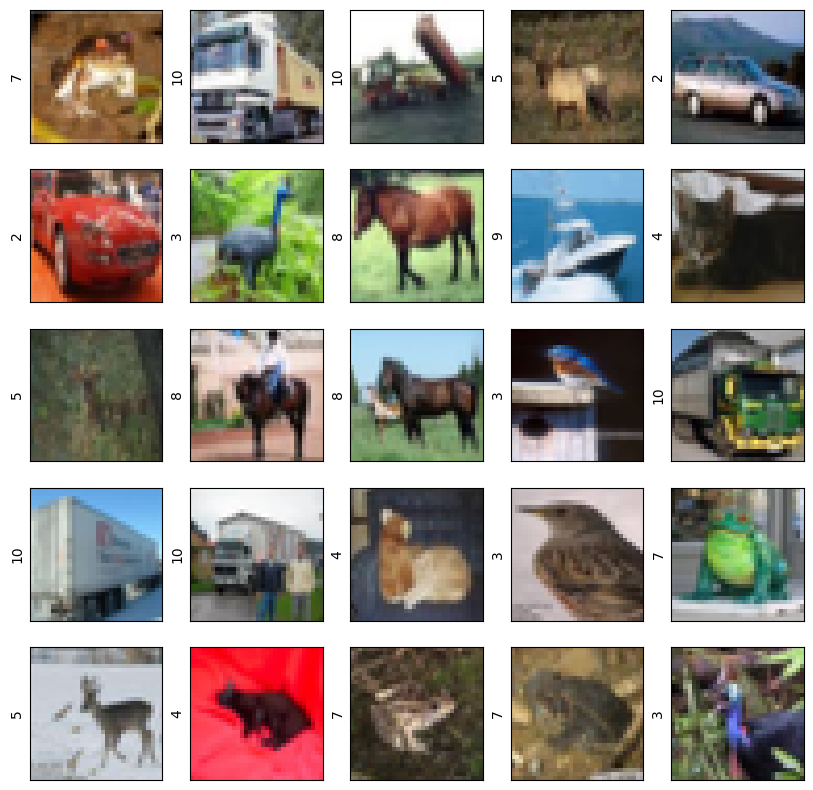

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.ylabel(class_names[y_train[i][0]])
plt.show()

In [11]:
from tensorflow.keras import layers,Sequential

In [12]:
model = Sequential()

In [13]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.8695 - accuracy: 0.3644 - val_loss: 1.5216 - val_accuracy: 0.4534
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.3770 - accuracy: 0.5056 - val_loss: 1.2428 - val_accuracy: 0.5515
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.2248 - accuracy: 0.5660 - val_loss: 1.1633 - val_accuracy: 0.5926
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1152 - accuracy: 0.6080 - val_loss: 1.1653 - val_accuracy: 0.5956
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0391 - accuracy: 0.6373 - val_loss: 1.0587 - val_accuracy: 0.6390
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9883 - accuracy: 0.6560 - val_loss: 1.0803 - val_accuracy: 0.6296
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9246 - accuracy: 0.6793 - val_loss: 1.0549 -

313/313 - 5s - loss: 1.0276 - accuracy: 0.6548 - 5s/epoch - 14ms/step


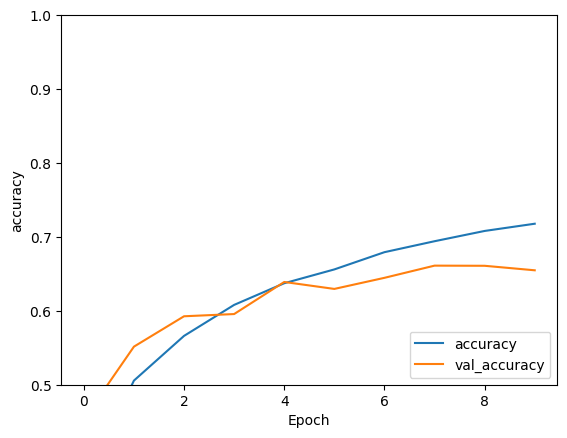

In [20]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(X_test,y_test,verbose=2)

In [21]:
y_pred = model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [22]:
y_pred

array([[ 4.9606514 ,  3.8777652 ,  3.084358  , ...,  4.2692313 ,
         8.259648  ,  2.3664894 ],
       [14.370458  , 12.476834  ,  2.1150575 , ..., -4.1519275 ,
        20.535364  ,  9.447434  ],
       [ 4.377841  ,  5.137016  ,  1.4493961 , ...,  3.5989366 ,
         4.8878613 ,  2.845381  ],
       ...,
       [ 1.6054646 , -2.7514746 ,  5.3750343 , ...,  5.113752  ,
        -2.5925243 , -1.2559007 ],
       [ 5.821082  ,  5.345713  ,  5.7072697 , ...,  6.376333  ,
        -0.17501873,  4.9822702 ],
       [-2.4394617 , -8.553453  ,  3.0769432 , ...,  7.931587  ,
        -7.929801  , -5.496635  ]], dtype=float32)

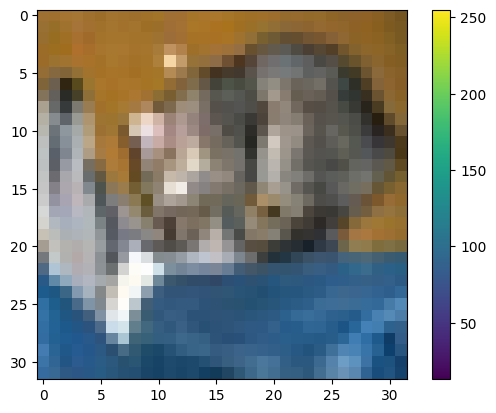

In [24]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()